<a href="https://colab.research.google.com/github/Noman-494/my_new/blob/main/Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question-**02**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Imported some common libraies

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')

Preprocessing of Data by checking null values and other information

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.duplicated().sum()

0

**Perfroming EDA to identify the Relationship between features and Identify the Outliers in Data**

<ipython-input-10-34f8ac8cfed5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


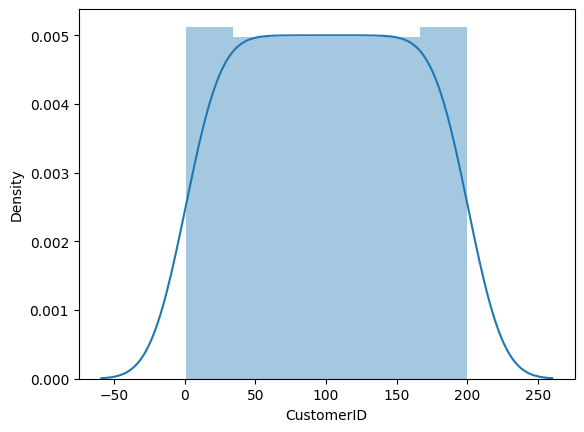

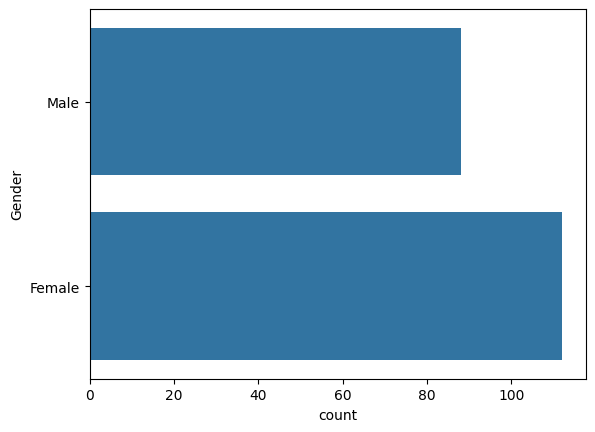

<ipython-input-10-34f8ac8cfed5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


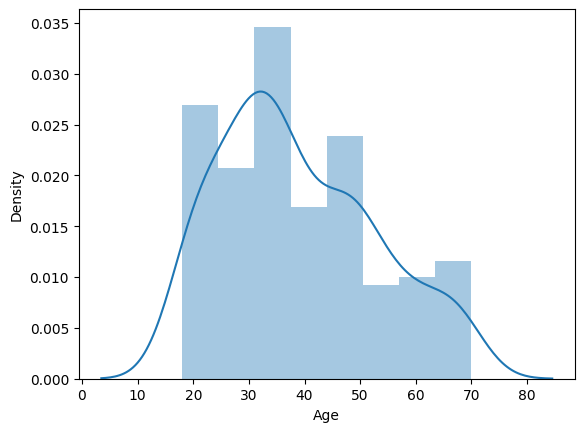

<ipython-input-10-34f8ac8cfed5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


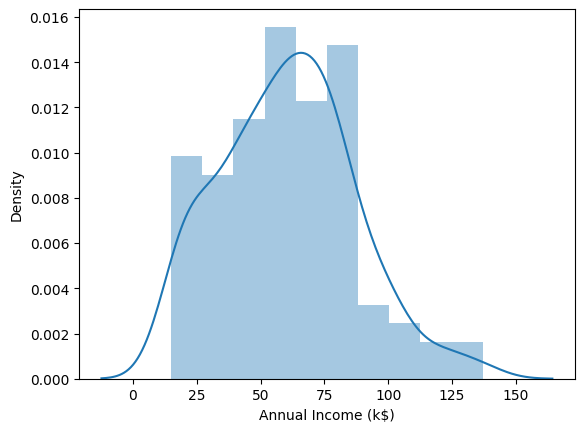

<ipython-input-10-34f8ac8cfed5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


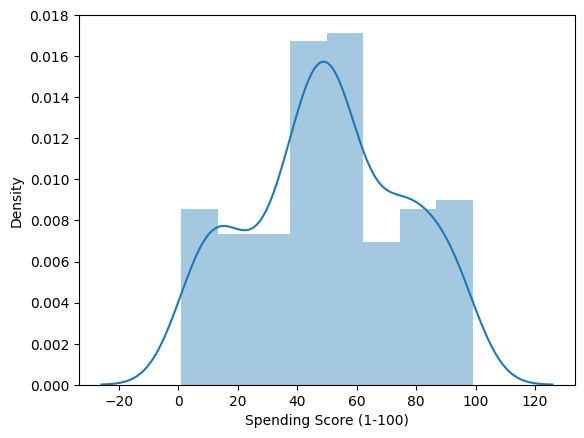

In [ ]:
for col in df:
  if df[col].dtype!='object':
    sns.distplot(df[col])
    plt.show()
  else:
    sns.countplot(df[col])
    plt.show()


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.drop('CustomerID',axis=1,inplace=True)

**Removing the Outliers**

In [ ]:

def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_filtered

for column in df.select_dtypes(include=np.number).columns:
    df = remove_outliers_iqr(df, column)

print(df.shape)


(198, 4)


In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Object column needs to be converted into Number as Machine only understand numbers**

In [ ]:

df['Gender']=pd.get_dummies(df['Gender'],drop_first=True)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,True,19,15,39
1,True,21,15,81
2,False,20,16,6
3,False,23,16,77
4,False,31,17,40


In [ ]:
from sklearn.preprocessing import StandardScaler

**Feature Scaling for Data to keep same weightage of features**

In [ ]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)


In [ ]:
scaled_df

array([[ 1.1411948 , -1.42541358, -1.77917141, -0.43598941],
       [ 1.1411948 , -1.2823665 , -1.77917141,  1.19941337],
       [-0.87627458, -1.35389004, -1.73944701, -1.72094874],
       [-0.87627458, -1.13931942, -1.73944701,  1.04366072],
       [-0.87627458, -0.5671311 , -1.69972262, -0.39705125],
       [-0.87627458, -1.21084296, -1.69972262,  1.00472256],
       [-0.87627458, -0.28103694, -1.65999822, -1.72094874],
       [-0.87627458, -1.13931942, -1.65999822,  1.70560947],
       [ 1.1411948 ,  1.79314572, -1.62027383, -1.83776323],
       [-0.87627458, -0.63865464, -1.62027383,  0.84896992],
       [ 1.1411948 ,  2.00771635, -1.62027383, -1.40944345],
       [-0.87627458, -0.28103694, -1.62027383,  1.90030028],
       [-0.87627458,  1.36400448, -1.58054943, -1.37050529],
       [-0.87627458, -1.06779588, -1.58054943,  1.04366072],
       [ 1.1411948 , -0.13798986, -1.58054943, -1.44838161],
       [ 1.1411948 , -1.21084296, -1.58054943,  1.12153705],
       [-0.87627458, -0.

In [ ]:
X=scaled_df

**Model Selection Kmeans as above data is type of unsupervised Ml means there is no output columns**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [ ]:
wcss

[792.0,
 582.6818210913364,
 472.15709261032896,
 383.1571881873294,
 322.9240995857,
 271.17182303020303,
 233.09385672552747,
 196.9794210489666,
 170.8651109860273,
 147.6925217978463,
 136.30291944392405,
 121.01737964706614,
 109.00144344896788,
 101.37617506372996,
 97.1226862357651,
 89.5679672179267,
 85.64408986243167,
 79.46833076801057,
 74.11382642103841]

Text(0, 0.5, 'WCSS')

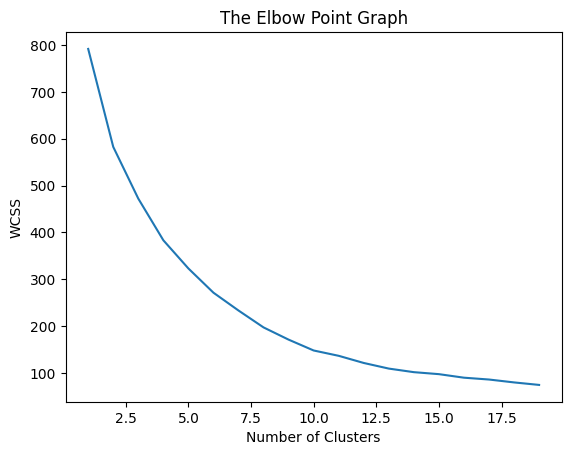

In [ ]:
plt.plot(range(1,20),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Custer Predication

In [ ]:
y_kmeans

array([4, 4, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 4, 0, 4, 2, 1, 2, 4,
       0, 4, 0, 4, 0, 4, 0, 1, 2, 1, 2, 4, 0, 1, 0, 1, 0, 1, 0, 4, 2, 1,
       0, 1, 0, 1, 1, 1, 0, 4, 1, 2, 0, 2, 0, 2, 1, 2, 2, 4, 0, 0, 2, 4,
       0, 0, 4, 1, 2, 0, 0, 0, 2, 4, 0, 4, 1, 0, 2, 4, 2, 0, 1, 2, 0, 1,
       1, 0, 0, 4, 2, 0, 1, 4, 0, 1, 2, 4, 1, 0, 2, 4, 2, 1, 0, 2, 2, 2,
       2, 1, 0, 4, 1, 1, 0, 0, 0, 0, 4, 0, 1, 4, 1, 1, 3, 4, 2, 4, 3, 4,
       1, 1, 3, 1, 3, 4, 3, 1, 3, 4, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 3, 4, 3, 1, 3, 1, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4],
      dtype=int32)

In [ ]:
X[y_kmeans==0]

array([[-0.87627458, -1.35389004, -1.73944701, -1.72094874],
       [-0.87627458, -0.5671311 , -1.69972262, -0.39705125],
       [-0.87627458, -0.28103694, -1.65999822, -1.72094874],
       [-0.87627458,  1.36400448, -1.58054943, -1.37050529],
       [-0.87627458, -0.28103694, -1.54082504, -0.59174206],
       [-0.87627458,  0.505722  , -1.38192745, -1.75988691],
       [-0.87627458,  1.07791032, -1.26275427, -1.40944345],
       [-0.87627458,  0.43419846, -1.26275427, -0.70855655],
       [-0.87627458,  0.07658076, -1.22302987, -0.74749471],
       [-0.87627458,  0.72029262, -1.06413229, -1.40944345],
       [-0.87627458,  0.21962784, -1.0244079 , -1.29262897],
       [-0.87627458, -0.2095134 , -0.90523471, -0.94218551],
       [-0.87627458,  1.86466927, -0.86551031, -0.59174206],
       [-0.87627458,  0.72029262, -0.82578592, -0.86430919],
       [-0.87627458,  0.79181616, -0.78606152,  0.18702117],
       [-0.87627458,  0.72029262, -0.70661273,  0.07020669],
       [-0.87627458,  0.

In [ ]:
X[y_kmeans==1]

array([[-0.87627458, -1.13931942, -1.73944701,  1.04366072],
       [-0.87627458, -1.21084296, -1.69972262,  1.00472256],
       [-0.87627458, -1.13931942, -1.65999822,  1.70560947],
       [-0.87627458, -0.63865464, -1.62027383,  0.84896992],
       [-0.87627458, -0.28103694, -1.62027383,  1.90030028],
       [-0.87627458, -1.06779588, -1.58054943,  1.04366072],
       [-0.87627458, -0.28103694, -1.46137625,  1.86136212],
       [-0.87627458, -1.13931942, -1.22302987,  1.43304234],
       [-0.87627458, -1.2823665 , -1.18330548,  0.88790808],
       [-0.87627458, -1.2823665 , -1.06413229,  1.19941337],
       [-0.87627458, -0.63865464, -1.0244079 ,  0.88790808],
       [-0.87627458, -1.35389004, -0.90523471,  0.9657844 ],
       [-0.87627458, -0.5671311 , -0.82578592,  0.42065014],
       [-0.87627458, -1.06779588, -0.82578592,  0.57640278],
       [-0.87627458, -0.85322526, -0.78606152, -0.12448412],
       [-0.87627458, -0.71017818, -0.78606152, -0.31917493],
       [-0.87627458, -0.

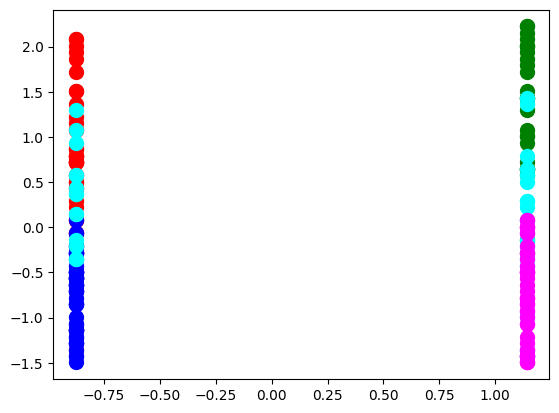

In [ ]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')

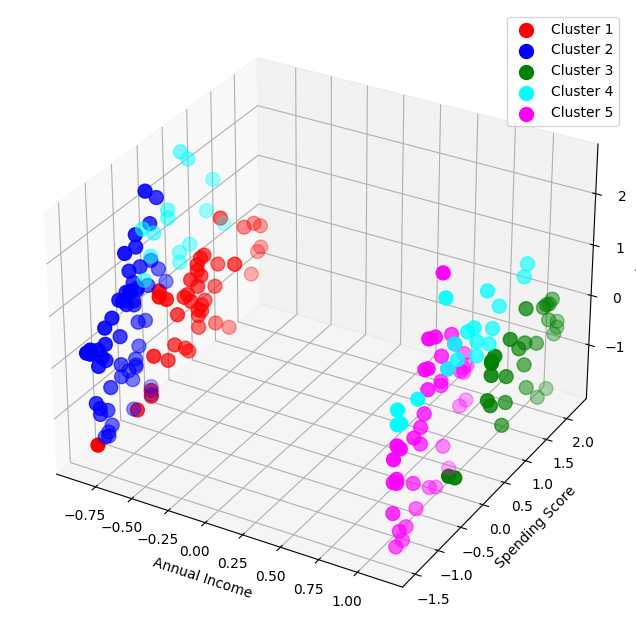

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s=100, c='red', label='Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s=100, c='blue', label='Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s=100, c='green', label='Cluster 3')
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s=100, c='cyan', label='Cluster 4')
ax.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s=100, c='magenta', label='Cluster 5')

ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Age')

plt.legend()
plt.show()


Question-**03**

**Preprocessing of Data**

In [ ]:
df02=pd.read_csv('/content/sales.csv')

In [ ]:
df02.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df02.drop(columns=["Item_Identifier","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"],axis=1,inplace=True)

In [ ]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 532.8+ KB


In [ ]:
df02.isnull().sum()

,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Item_Outlet_Sales,0


In [ ]:
df02.Item_Weight.fillna(df02.Item_Weight.mean(),inplace=True)
df02.Outlet_Size.fillna(df02.Outlet_Size.mode()[0],inplace=True)

In [ ]:
df02.isnull().sum()

,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Establishment_Year,0
Outlet_Size,0
Item_Outlet_Sales,0


EDA to check the distrubtion and outliers in the DATA

<ipython-input-31-3041db322f89>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df02[col])


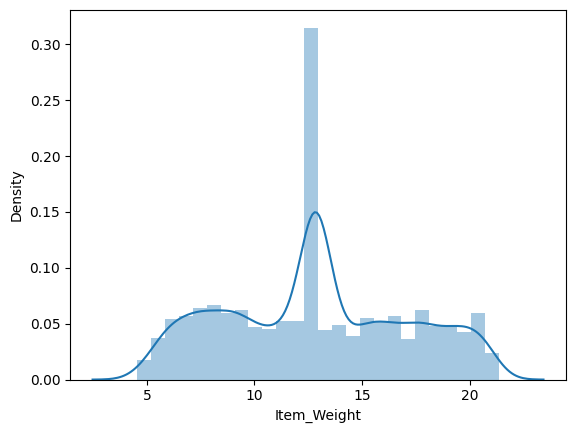

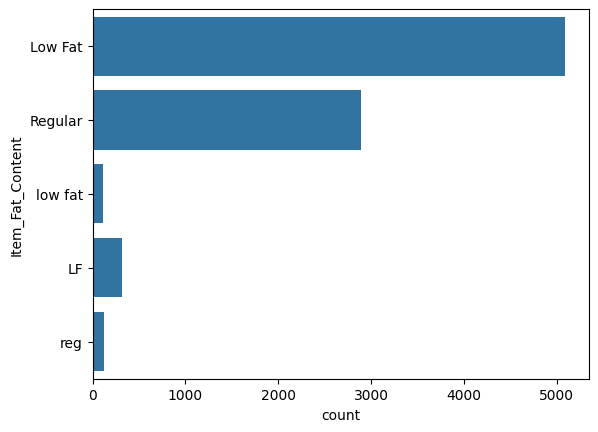

<ipython-input-31-3041db322f89>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df02[col])


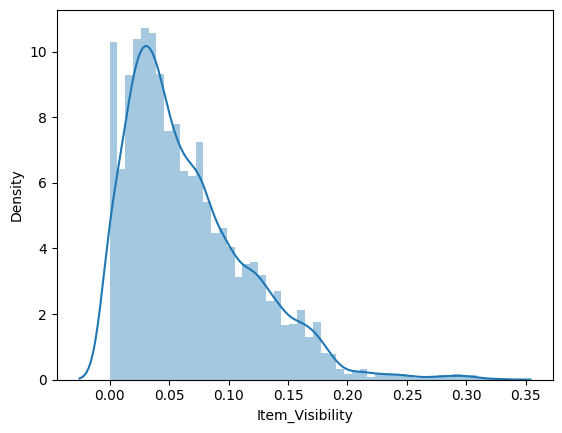

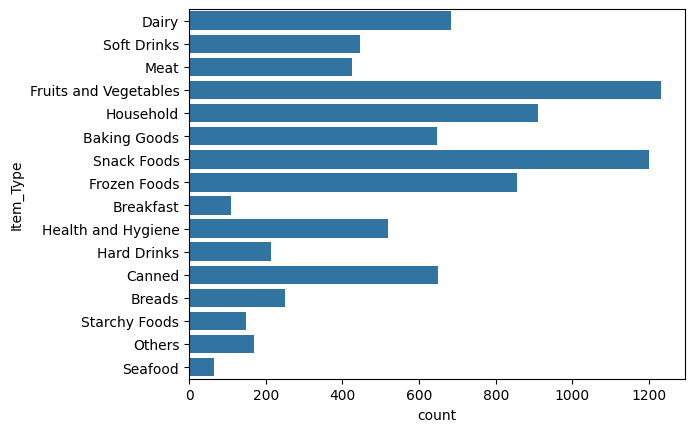

<ipython-input-31-3041db322f89>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df02[col])


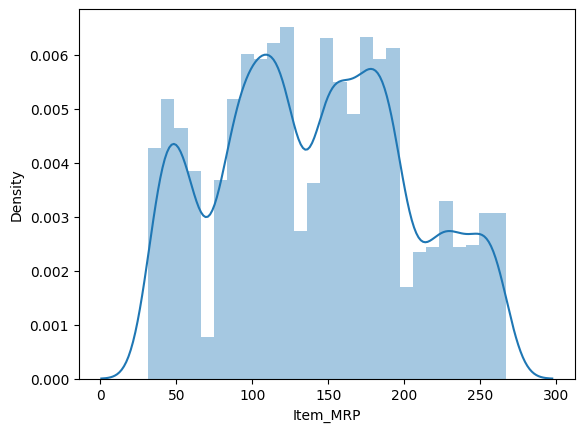

<ipython-input-31-3041db322f89>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df02[col])


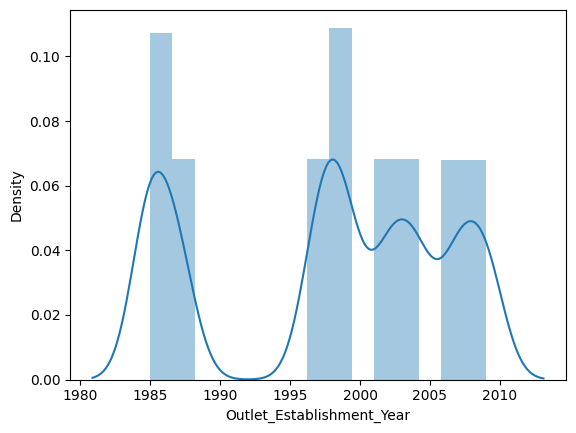

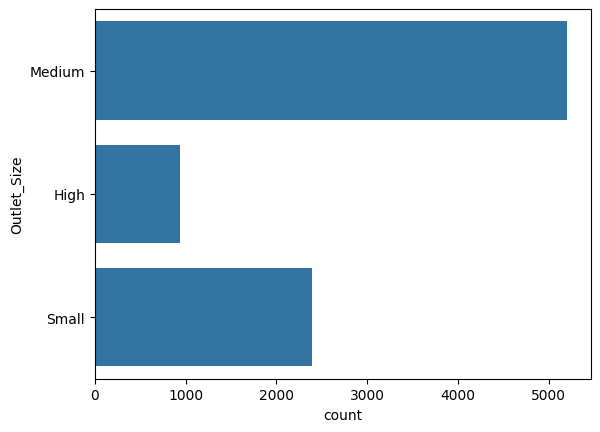

<ipython-input-31-3041db322f89>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df02[col])


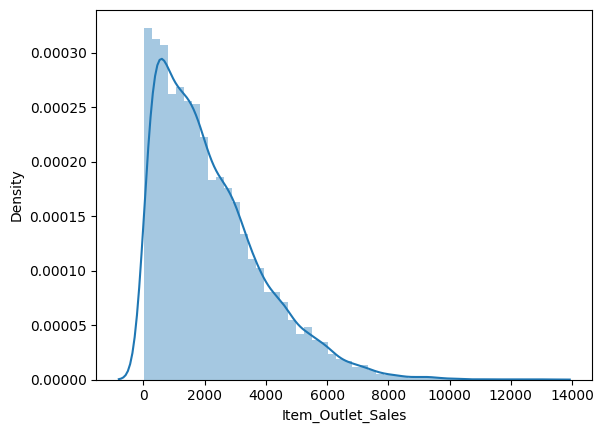

In [ ]:
for col in df02:
  if df02[col].dtype!='object':
    sns.distplot(df02[col])
    plt.show()
  else:
    sns.countplot(df02[col])
    plt.show()

**Removing the Outliers**

In [ ]:

def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_filtered

for column in df02.select_dtypes(include=np.number).columns:
    df02 = remove_outliers_iqr(df02, column)


In [ ]:
df02.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8193 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8193 non-null   float64
 1   Item_Fat_Content           8193 non-null   object 
 2   Item_Visibility            8193 non-null   float64
 3   Item_Type                  8193 non-null   object 
 4   Item_MRP                   8193 non-null   float64
 5   Outlet_Establishment_Year  8193 non-null   int64  
 6   Outlet_Size                8193 non-null   object 
 7   Item_Outlet_Sales          8193 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 576.1+ KB


In [ ]:
X=df02.drop(columns=["Item_Outlet_Sales"],axis=1)
y=df02["Item_Outlet_Sales"]

In [ ]:
df02.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
df02.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
df02.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size
1766,18.750,Low Fat,0.010366,Household,207.0954,1997,Small
8196,13.000,Regular,0.083683,Canned,198.5426,2002,Medium
6669,4.635,Low Fat,0.140862,Breads,126.4994,2004,Small
5132,5.590,Regular,0.056556,Snack Foods,62.6168,1987,High
4439,8.710,Regular,0.046080,Dairy,43.5744,2002,Medium


**Bulding Pipeline to analyze different models**

In [ ]:
numerical_trans=Pipeline(steps=[
    ('scaler',StandardScaler())
])

In [ ]:
ohe_transformer=Pipeline(steps=[
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'))
])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
category=['Small','Medium', 'High']

In [ ]:
ordinal_trans=Pipeline(steps=[
    ('ordinal',OrdinalEncoder(categories=[category]))
])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6554 entries, 1766 to 7567
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                6554 non-null   float64
 1   Item_Fat_Content           6554 non-null   object 
 2   Item_Visibility            6554 non-null   float64
 3   Item_Type                  6554 non-null   object 
 4   Item_MRP                   6554 non-null   float64
 5   Outlet_Establishment_Year  6554 non-null   int64  
 6   Outlet_Size                6554 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 409.6+ KB


In [ ]:
tr01=ColumnTransformer([
    ('numerical',numerical_trans,[0,2,4,5]),
    ('categorical',ohe_transformer,[1,3]),
    ('ordinal',ordinal_trans,[6])
],remainder='passthrough')

In [ ]:
from sklearn.feature_selection import SelectKBest,f_regression

In [ ]:
tr02=SelectKBest(score_func=f_regression,k=5)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
pipe_LR=Pipeline([
    ('tr01',tr01),
    ('tr02',tr02),
    ('model',LinearRegression())
])

**Model01**

In [ ]:
pipe_LR.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 2, 4, 5]),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 3]),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']]))]),
                                                  [6])])),
                ('tr02',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x7ae3fd35af80>)),
                ('model', LinearRegression())])

In [ ]:
pipe_LR.score(X_test,y_test)

0.31338783794148284

**Model02**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
pipe_DT=Pipeline([
    ('tr01',tr01),
    ('tr02',tr02),
    ('model',DecisionTreeRegressor())
])

In [ ]:
pipe_DT.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 2, 4, 5]),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 3]),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']]))]),
                                                  [6])])),
                ('tr02',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x7ae3fd35af80>)),
                ('model', DecisionTreeRegressor())])

In [ ]:
pipe_DT.score(X_test,y_test)

-0.2750299303227488

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
pipe_RF=Pipeline([
    ('tr01',tr01),
    ('tr02',tr02),
    ('model',RandomForestRegressor())
])

**Model03**

In [ ]:
pipe_RF.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 2, 4, 5]),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 3]),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']]))]),
                                                  [6])])),
                ('tr02',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x7ae3fd35af80>)),
                ('model', RandomForestRegressor())])

In [ ]:
pipe_RF.score(X_test,y_test)

0.23252120877767113

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
pipe_KNN=Pipeline([
    ('tr01',tr01),
    ('tr02',tr02),
    ('model',KNeighborsRegressor())
])

**Model04**

In [ ]:
pipe_KNN.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 2, 4, 5]),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 3]),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']]))]),
                                                  [6])])),
                ('tr02',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x7ae3fd35af80>)),
                ('model', KNeighborsRegressor())])

In [ ]:
from sklearn.svm import SVR

In [ ]:
pipe_SVR=Pipeline([
    ('tr01',tr01),
    ('tr02',tr02),
    ('model',SVR())
])

**Model05**

In [ ]:
pipe_SVR.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 2, 4, 5]),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 3]),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']]))]),
                                                  [6])])),
                ('tr02',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x7ae3fd35af80>)),
                ('model', SVR())])

In [ ]:
pipe_SVR.score(X_test,y_test)

0.12679335290701343

In [ ]:
pipe_KNN.score(X_test,y_test)

0.20707841679624406

In [ ]:
from sklearn.model_selection import GridSearchCV

Tunning **Hypermaters**

In [ ]:
parametes={"tr02__k":[1,2,3,4,5,6]}


In [ ]:
grid=GridSearchCV(pipe_LR,param_grid=parametes,cv=5)
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tr01',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [0, 2,
                                                                          4,
                                                                          5]),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         [1,
                                                                          3]),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(categories=[['Small',
                                                                                                                      'Medium',
                                                                                                                      'High']]))]),
                                                                         [6])])),
                                       ('tr02',
                                        SelectKBest(k=5,
                                                    score_func=<function f_regression at 0x7ae3fd35af80>)),
                                       ('model', LinearRegression())]),
             param_grid={'tr02__k': [1, 2, 3, 4, 5, 6]})

In [ ]:
grid.best_params_

{'tr02__k': 5}

In [ ]:
grid.score(X_test,y_test)

0.31338783794148284

Questin--**04**

In [ ]:

from sklearn.datasets import fetch_openml

titanic = fetch_openml(name="titanic", version=1)
df_titanic = pd.DataFrame(data=titanic.data, columns=titanic.feature_names)
df_titanic['target'] = titanic.target


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Preprcossing of Data**

In [ ]:
df_titanic.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,target
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  target     1309 non-null   category
dtypes: category(3), float64(6), object(5)
memory usage: 116.8+ KB


In [ ]:
df=df_titanic.copy()

In [ ]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,target
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [ ]:
df.drop(columns=["name","ticket","cabin","boat","body","home.dest"],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   float64 
 1   sex       1309 non-null   category
 2   age       1046 non-null   float64 
 3   sibsp     1309 non-null   float64 
 4   parch     1309 non-null   float64 
 5   fare      1308 non-null   float64 
 6   embarked  1307 non-null   category
 7   target    1309 non-null   category
dtypes: category(3), float64(5)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

,0
pclass,0
sex,0
age,263
sibsp,0
parch,0
fare,1
embarked,2
target,0


In [ ]:
df.age.fillna(df.age.mean(),inplace=True)
df.fare.fillna(df.fare.mean(),inplace=True)
df.embarked.fillna(df.embarked.mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
target,0


In [ ]:
import seaborn as sns

**EDA**

<ipython-input-105-3979115ee506>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


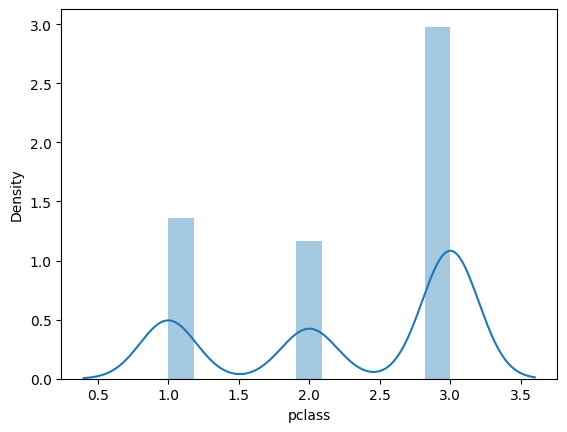

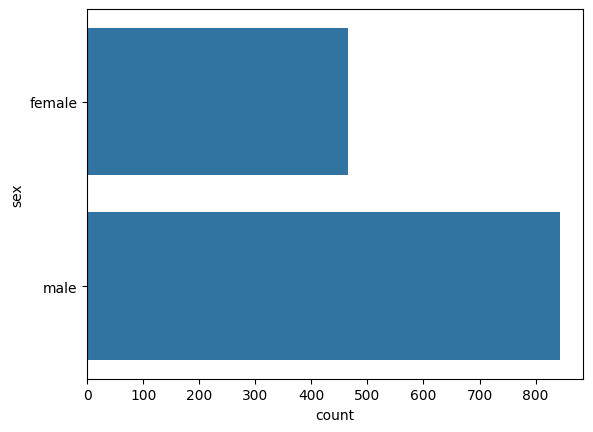

<ipython-input-105-3979115ee506>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


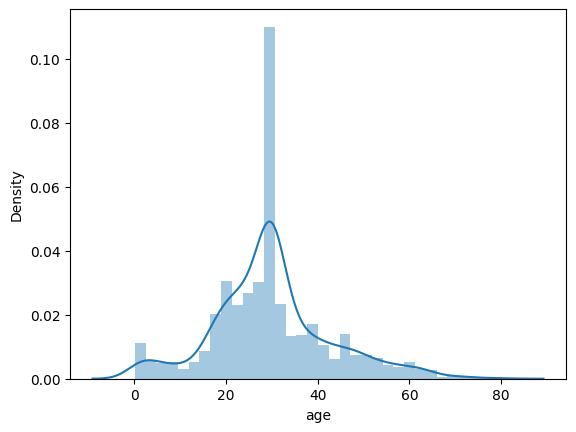

<ipython-input-105-3979115ee506>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


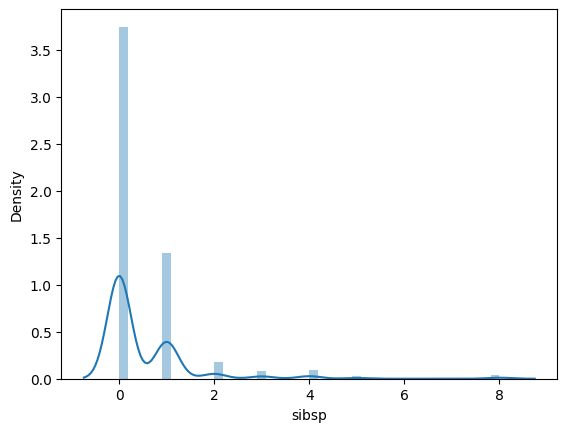

<ipython-input-105-3979115ee506>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


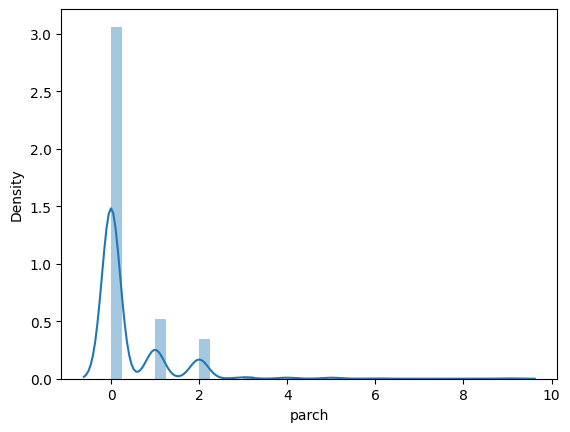

<ipython-input-105-3979115ee506>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


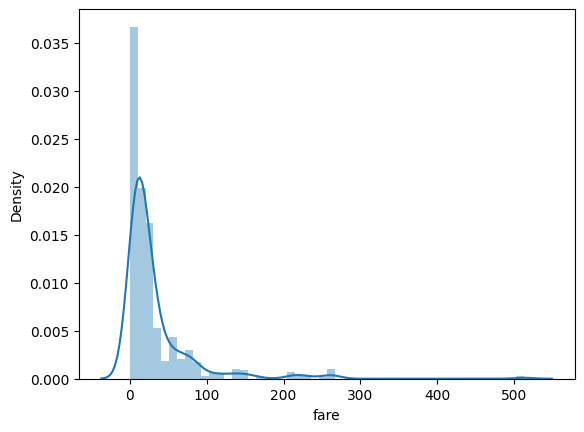

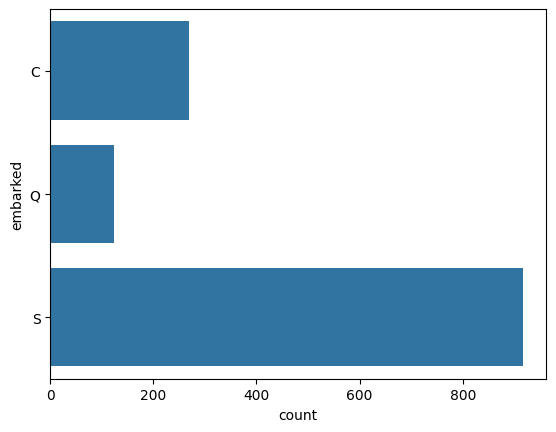

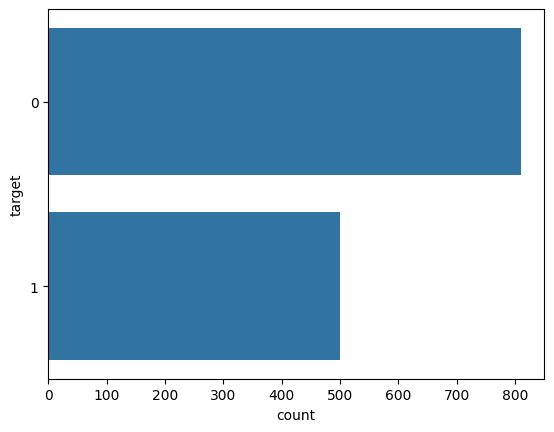

In [ ]:
for col in df:
  if df[col].dtype!='category':
      sns.distplot(df[col])
      plt.show()
  else:
    sns.countplot(df[col])
    plt.show()

In [ ]:

def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_filtered

for column in df.select_dtypes(include=np.number).columns:
    df = remove_outliers_iqr(df, column)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 832 entries, 5 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    832 non-null    float64 
 1   sex       832 non-null    category
 2   age       832 non-null    float64 
 3   sibsp     832 non-null    float64 
 4   parch     832 non-null    float64 
 5   fare      832 non-null    float64 
 6   embarked  832 non-null    category
 7   target    832 non-null    category
dtypes: category(3), float64(5)
memory usage: 41.8 KB


In [ ]:
df.embarked.unique()

['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S']

In [ ]:
X=df.drop(columns=["target"],axis=1)
y=df["target"]

In [ ]:
y

,target
5,1
7,0
8,1
15,0
22,1
...,...
1304,0
1305,0
1306,0
1307,0


**Buliding of Pipline**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
numerical_trans=Pipeline(steps=[
    ('scaler',MinMaxScaler())
])

In [ ]:
categor_tran=Pipeline(steps=[
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'))
])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 665 entries, 852 to 288
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    665 non-null    float64 
 1   sex       665 non-null    category
 2   age       665 non-null    float64 
 3   sibsp     665 non-null    float64 
 4   parch     665 non-null    float64 
 5   fare      665 non-null    float64 
 6   embarked  665 non-null    category
dtypes: category(2), float64(5)
memory usage: 32.7 KB


In [ ]:
tr01=ColumnTransformer([
    ('numerical',numerical_trans,[0,2,3,4,5]),
    ('categorical',categor_tran,[1,6])
],remainder='passthrough')

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
tr02=SelectKBest(score_func=chi2,k=5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pipe_RF=Pipeline([
    ('tr01',tr01),
    ('tr02',tr02),
    ('model',RandomForestClassifier())
])

In [ ]:
pipe_RF.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  [0, 2, 3, 4, 5]),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 6])])),
                ('tr02',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x7ae3fd359630>)),
                ('model', RandomForestClassifier())])

In [ ]:
pipe_RF.score(X_test,y_test)

0.7964071856287425

In [ ]:
pipe_DT=Pipeline([
    ('tr01',tr01),
    ('tr02',tr02),
    ('model',DecisionTreeClassifier())
])

In [ ]:
pipe_DT.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  [0, 2, 3, 4, 5]),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 6])])),
                ('tr02',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x7ae3fd359630>)),
                ('model', DecisionTreeClassifier())])

In [ ]:
pipe_DT.score(X_test,y_test)

0.7964071856287425

[Text(0.5555555555555556, 0.875, 'sex <= 0.5\ngini = 0.408\nsamples = 665\nvalue = [475, 190]'),
 Text(0.3333333333333333, 0.625, 'age <= 0.5\ngini = 0.444\nsamples = 168\nvalue = [56, 112]'),
 Text(0.2222222222222222, 0.375, 'parch <= 0.5\ngini = 0.459\nsamples = 143\nvalue = [51, 92]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.449\nsamples = 44\nvalue = [15, 29]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.463\nsamples = 99\nvalue = [36, 63]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.32\nsamples = 25\nvalue = [5, 20]'),
 Text(0.7777777777777778, 0.625, 'age <= 0.5\ngini = 0.265\nsamples = 497\nvalue = [419, 78]'),
 Text(0.6666666666666666, 0.375, 'parch <= 0.5\ngini = 0.239\nsamples = 419\nvalue = [361, 58]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.26\nsamples = 39\nvalue = [33, 6]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.236\nsamples = 380\nvalue = [328, 52]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.381\nsamples = 78\nvalue = [58, 20]')]

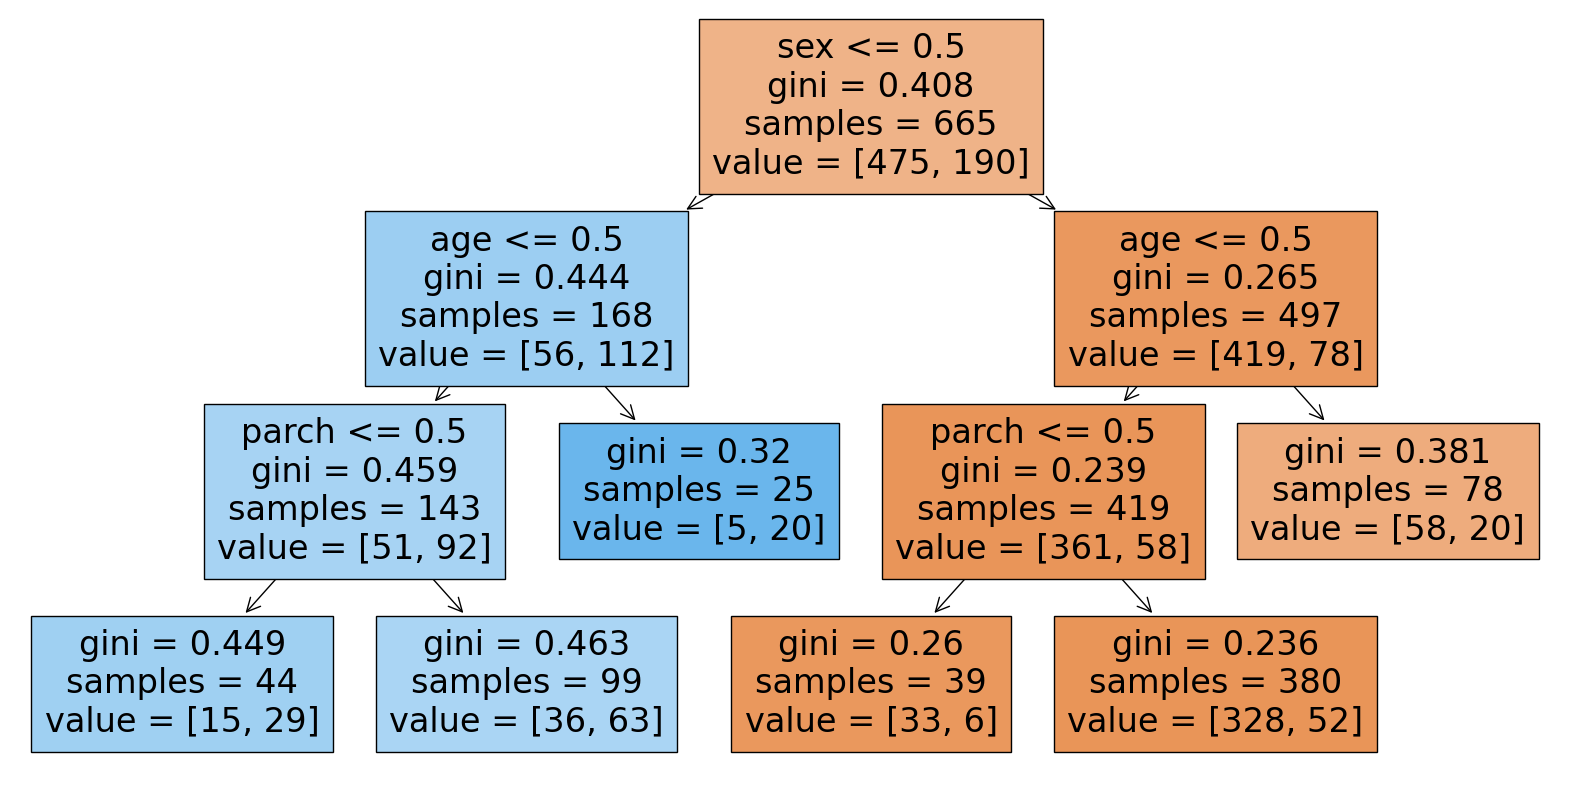

In [ ]:

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(pipe_DT['model'],feature_names=X_train.columns,filled=True)

In [ ]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30]}

In [ ]:
grid=GridSearchCV(pipe_RF,param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tr01',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         [0, 2,
                                                                          3, 4,
                                                                          5]),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         [1,
                                                                          6])])),
                                       ('tr02',
                                        SelectKBest(k=5,
                                                    score_func=<function chi2 at 0x7ae3fd359630>)),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__n_estimators': [100, 200, 300]})

In [ ]:
grid.best_params_

{'model__max_depth': None, 'model__n_estimators': 100}

In [ ]:
grid.score(X_test,y_test)

0.7964071856287425

In [ ]:


models = [
    ("Decision Tree", pipe_DT.score(X_test, y_test)),
    ("Random Forest", pipe_RF.score(X_test, y_test)),
]

df_models = pd.DataFrame(models, columns=["Model", "Accuracy"])
print(df_models)


           Model  Accuracy
0  Decision Tree  0.796407
1  Random Forest  0.796407


Question-**01**

 **Reinforcement Learning**


Reinforcement learning is a powerful technique for training agents to make optimal decisions in dynamic environments.It's like training a dog: you give it rewards when it does something good, and it learns to repeat those actions to get more rewards.you have to learn from hard condtions and by the time performance is imporved.Can learn complex tasks in dynamic environments.Example Game playing.


**Underfititng and Overfitting**
Underfitting and overfitting are common issues in machine learning that affect the performance of models. Both relate to how well a model learns patterns in the training data and how well it generalizes to unseen data.
Underfitting is some like student who is not preparing for exam and not performing well during the exam beacause at training time he did not prepared well. Similarly in case of overfiting Student has prepared so hard on the specfic based specially on theory and but at exam he was unable to cop with real scenario. Same happen with models



-**What is bias variance tradeoff**.
The bias-variance tradeoff is a fundamental concept in machine learning that describes the trade-off between a model’s ability to generalize well to unseen data (low variance) and its ability to capture the underlying patterns in the training data (low bias). Understanding this tradeoff is crucial for building models that perform well on both the training data and new, unseen data.




**what is F1 score**
The F1 score is a performance metric used to evaluate the accuracy of a classification model. It combines precision and recall into a single metric to provide a more balanced assessment of a model’s performance.



In [ ]:
#from sklearn.metrics import f1_score